In [20]:
import pandas as pd
import numpy as np
import math
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
from scipy import stats

#### Question 6
The structure of the perturbation is  <br /> 
$\phi = \Phi_0 cosh[i(kx-\omega t)]$  <br />
because of the finite depth. $\Phi_0$ is set by the boundary condition. The corresponding code is contained in the event init part. The potential energy has to be shifted to zero.  

#### Question 7
Set $U_1 = 0, U_2 = 1$, the flow is stable. Perturbation is oscillating and decaying.

#### Question 8
Calculation of energy growth curve: <br />
$E = E_0 e^{2st}$ <br />
$ln [(E/E_0] = 2st$ <br />
which is plotted on the right.
The theoretical growth rate is 2.772, the computed one is 0.58(Increasing the refine level does not change the result). As for the phase speed, the theoretical phase spped is 0.18, and the simulated phase speed is 0.17 which fits quite well.

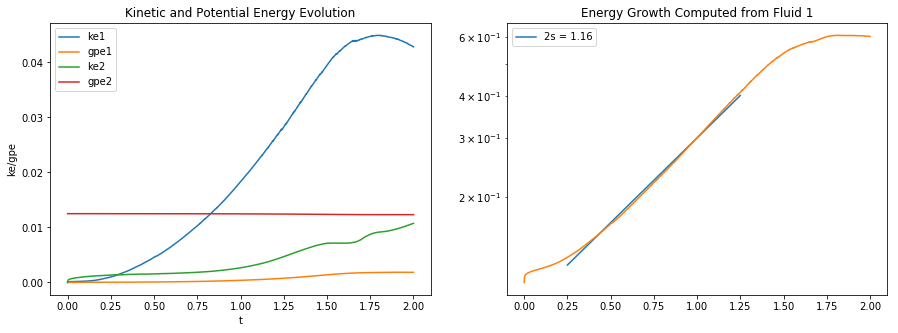

In [30]:
energy1 = pd.read_table('./P8/budgetFluid1.dat', delimiter = ' ')
energy2 = pd.read_table('./P8/budgetFluid2.dat', delimiter = ' ')
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(energy1.t, energy1.ke)
ax1.plot(energy1.t, energy1.gpe + 0.125)
ax1.plot(energy2.t, energy2.ke)
ax1.plot(energy2.t, energy2.gpe)
ax1.legend(['ke1', 'gpe1', 'ke2', 'gpe2'])
ax1.set_title('Kinetic and Potential Energy Evolution')
ax1.set_xlabel('t')
ax1.set_ylabel('ke/gpe')

energy_norm = (energy1.ke + energy1.gpe + 0.125 + energy2.ke + energy2.gpe)/ abs(energy1.iloc[0].ke +
             energy1.iloc[0].gpe + energy2.iloc[0].ke + energy2.iloc[0].gpe)
# Filter and take the logarithm
total_hat = np.log(savgol_filter(energy_norm, 21, 5))
# Make a choice of which part to fit
slope, intercept, r_value, p_value, std_err = stats.linregress(energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'], 
                                                               total_hat[(energy1.t > 0.25) & (energy1.t < 1.25)])
line = slope * energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'] + intercept
ax2.plot(energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'], np.exp(line), 
         label = '2s = %4.2f' % slope)
ax2.plot(energy1.t, energy_norm)
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Energy Growth Computed from Fluid 1')
fig.show()

Running a higher resolution case.

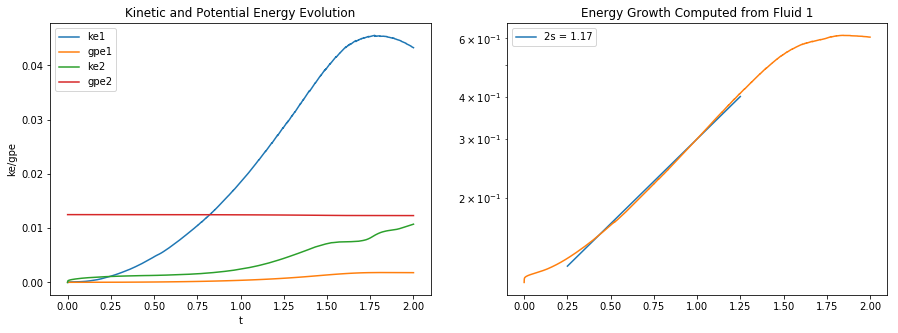

In [27]:
energy1 = pd.read_table('./P8/test/budgetFluid1.dat', delimiter = ' ')
energy2 = pd.read_table('./P8/test/budgetFluid2.dat', delimiter = ' ')
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(energy1.t, energy1.ke)
ax1.plot(energy1.t, energy1.gpe + 0.125)
ax1.plot(energy2.t, energy2.ke)
ax1.plot(energy2.t, energy2.gpe)
ax1.legend(['ke1', 'gpe1', 'ke2', 'gpe2'])
ax1.set_title('Kinetic and Potential Energy Evolution')
ax1.set_xlabel('t')
ax1.set_ylabel('ke/gpe')

energy_norm = (energy1.ke + energy1.gpe + 0.125 + energy2.ke + energy2.gpe)/ abs(energy1.iloc[0].ke +
             energy1.iloc[0].gpe + energy2.iloc[0].ke + energy2.iloc[0].gpe)
# Filter and take the logarithm
total_hat = np.log(savgol_filter(energy_norm, 21, 5))
# Make a choice of which part to fit
slope, intercept, r_value, p_value, std_err = stats.linregress(energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'], 
                                                               total_hat[(energy1.t > 0.25) & (energy1.t < 1.25)])
line = slope * energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'] + intercept
ax2.plot(energy1[(energy1.t > 0.25) & (energy1.t < 1.25)]['t'], np.exp(line), 
         label = '2s = %4.2f' % slope)
ax2.plot(energy1.t, energy_norm)
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Energy Growth Computed from Fluid 1')
fig.show()

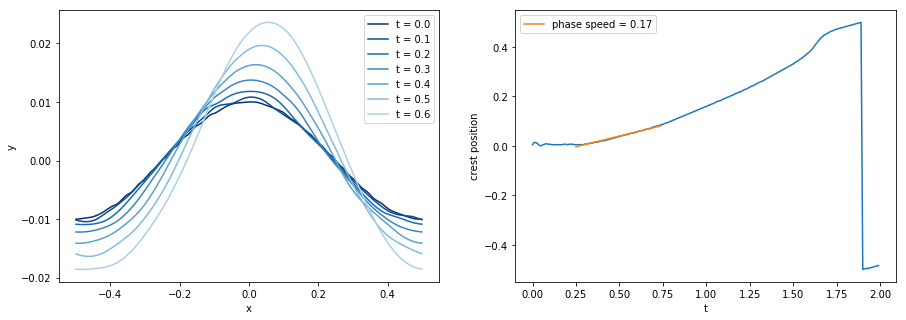

In [22]:
evolution = np.zeros([200, 2])
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
color_idx = np.linspace(1, 0, 10)
j = 0 # For color indexing
for i in range (0, 200):
    t = i/100.
    evolution[i, 0] = t
    filename = "./P8/Interface/results%4.2f_%d.dat" % (t, 0)
    interface = pd.read_table(filename, names = ['x','y'], delimiter = ' ')
    interface = interface.sort_values(by=['x'])
    evolution[i, 1] = interface.loc[interface['y'].idxmax()]['x']
    if (i%10 == 0) & (i < 70):
        ax1.plot(interface.x, interface.y, label = 't = ' + str(t), color=plt.cm.get_cmap('Blues')(color_idx[j]))
        j += 1

slope, intercept, r_value, p_value, std_err = stats.linregress(evolution[25:75, 0], evolution[25:75, 1])
line = slope*evolution[25:75, 0] + intercept
ax2.plot(evolution[:,0], evolution[:,1])
ax2.plot(evolution[25:75, 0], line, label = 'phase speed = %4.2f' % slope)
ax1.legend()
ax2.legend()
ax1.set_xlabel('x') 
ax1.set_ylabel('y')
ax2.set_xlabel('t')
ax2.set_ylabel('crest position')
fig.show()

#### Question 9
Choose $\rho_1 = 10 \rho_2, U_2 = -10 U_1$ so that  $\rho_1 U_1 + \rho_2 U2 = 0$.
The real part of $s$ still exist so that the perturbation growths but not move. However, due to the viscous effect and some possible numerical viscosity the profile still shifts a little.
The jiggling in initial profile may come from the coarse grid.  <br />
Take $U_1 = -0.4, U_2 = 4, \rho_1 = 10, \rho_2 = 1$, <br />
The theoretical growth rate is 7.6 in this case and the simulated growth rate is 3.37. Still it is smaller than theoretical value, possibly due to viscous effect.

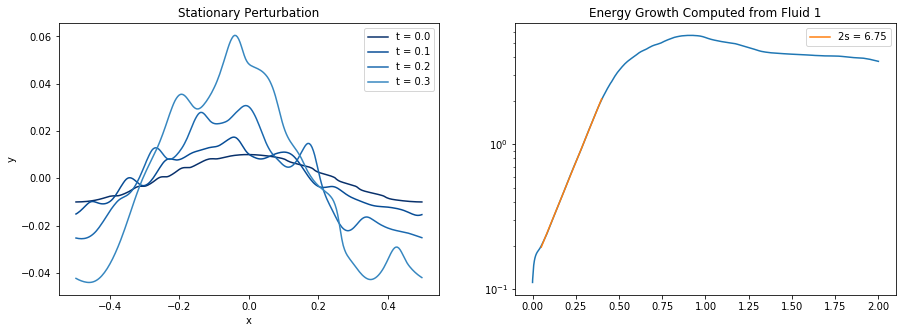

In [31]:
evolution = np.zeros([200, 2])
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
color_idx = np.linspace(1, 0, 10)
j = 0 # For color indexing
for i in range (0, 40):
    t = i/100.
    evolution[i, 0] = t
    filename = "./P9/Interface/results%4.2f_%d.dat" % (t, 0)
    interface = pd.read_table(filename, names = ['x','y'], delimiter = ' ')
    interface = interface.sort_values(by=['x'])
    evolution[i, 1] = interface.loc[interface['y'].idxmax()]['x']
    if (i%10 == 0):
        ax1.plot(interface.x, interface.y, label = 't = ' + str(t), color=plt.cm.get_cmap('Blues')(color_idx[j]))
        j += 1

slope, intercept, r_value, p_value, std_err = stats.linregress(evolution[75:150, 0], evolution[75:150, 1])
line = slope*evolution[75:150, 0] + intercept
# ax2.plot(evolution[:,0], evolution[:,1])
# ax2.plot(evolution[75:150, 0], line, label = 'phase speed = %4.2f' % slope)
ax1.legend()
ax1.set_xlabel('x') 
ax1.set_ylabel('y')
ax1.set_title('Stationary Perturbation')

energy1 = pd.read_table('./P9/budgetFluid1.dat', delimiter = ' ')
energy2 = pd.read_table('./P9/budgetFluid2.dat', delimiter = ' ')
energy_norm = (energy1.ke + energy1.gpe + 0.125 + energy2.ke + energy2.gpe)/ abs(energy1.iloc[0].ke +
             energy1.iloc[0].gpe + energy2.iloc[0].ke + energy2.iloc[0].gpe)
# Filter and take the logarithm
total_hat = np.log(savgol_filter(energy_norm, 21, 5))
# Make a choice of which part to fit
slope, intercept, r_value, p_value, std_err = stats.linregress(energy1[(energy1.t > 0.05) & (energy1.t < 0.4)]['t'], 
                                                               total_hat[(energy1.t > 0.05) & (energy1.t < 0.4)])
line = slope * energy1[(energy1.t > 0.05) & (energy1.t < 0.4)]['t'] + intercept
ax2.plot(energy1.t, energy_norm)
ax2.plot(energy1[(energy1.t > 0.05) & (energy1.t < 0.4)]['t'], np.exp(line), 
         label = '2s = %4.2f' % slope)
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Energy Growth Computed from Fluid 1')
fig.show()

#### Question 10
Replace $cos(kx)$ with $cos(4kx)$. <br />
The flow evolution is as below. Color shows vorticity. There is vortex pairing after some time. A pair of vortices act on each other and develop into lower frequency mode.

![](./P10/1.png)  |  ![](./P10/2.png) |  ![](./P10/3.png)
:----------------:|:-----------------:|:-------------------:
![](./P10/4.png)  |  ![](./P10/5.png) |  ![](./P10/6.png)

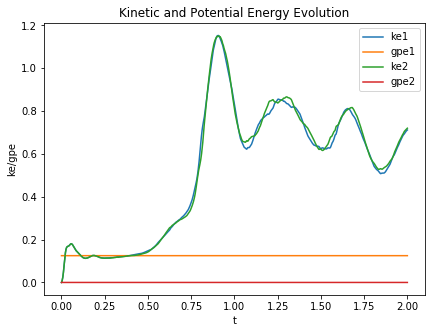

In [24]:
energy1 = pd.read_table('./P10/budgetFluid1.dat', delimiter = ' ')
energy2 = pd.read_table('./P10/budgetFluid2.dat', delimiter = ' ')
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)

ax1.plot(energy1.t, energy1.ke)
ax1.plot(energy1.t, energy1.gpe + 0.125)
ax1.plot(energy2.t, energy2.ke)
ax1.plot(energy2.t, energy2.gpe)
ax1.legend(['ke1', 'gpe1', 'ke2', 'gpe2'])
ax1.set_title('Kinetic and Potential Energy Evolution')
ax1.set_xlabel('t')
ax1.set_ylabel('ke/gpe')

fig.show()

#### Question 10 Extra
Increasing the refinement level can help us resolve the second time vortex pairing.

After first mergence       |  After second mergence
:-------------------------:|:-------------------------:
![](./P10/test/1.png)      |  ![](./P10/test/2.png)

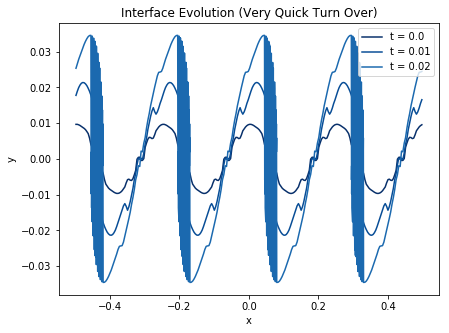

In [29]:
evolution = np.zeros([200, 2])
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
color_idx = np.linspace(1, 0, 10)
j = 0 # For color indexing
for i in range (0, 200):
    t = i/100.
    evolution[i, 0] = t
    filename = "./P10/Interface/results%4.2f_%d.dat" % (t, 0)
    interface = pd.read_table(filename, names = ['x','y'], delimiter = ' ')
    interface = interface.sort_values(by=['x'])
    evolution[i, 1] = interface.loc[interface['y'].idxmax()]['x']
    if (i%1 == 0) & (i < 3):
        ax1.plot(interface.x, interface.y, label = 't = ' + str(t), color=plt.cm.get_cmap('Blues')(color_idx[j]))
        j += 1
ax1.legend()
ax1.set_xlabel('x') 
ax1.set_ylabel('y')
ax1.set_title('Interface Evolution (Very Quick Turn Over)')
fig.show()

#### Question 11
The dispersion relation is 
$4(k\delta)^2 (c - U_m)^2- \Delta U^2[(2k\delta-1)^2 - e^{-4k\delta}] = 0$ The flow is stable when $(2k\delta-1)^2 - e^{-4k\delta}$ is larger than zero, i.e. when $k\delta > 0.64$. <br />
When the flow is stable, there is a viscous diffusion of the mix layer, happening over a time scale of $\delta^2/\nu$, $\nu$ being the viscosity. <br /> 
Below is the vorticity contour and the mix layer is gradually thickening and decaying away.

![](./P11/1.png)  |  ![](./P11/2.png) |  ![](./P11/3.png)  |  ![](./P11/4.png)
:----------------:|:-----------------:|:------------------:|:-------------------:

#### Question 12
Take the limit when $k\delta \to 0$ we get $c = \frac{k}{2}(U_m \pm i\Delta U)$, where $U_m = 1/2(U_1 + U_2), \Delta U = 1/2(U_1-U_2)$ This goes back to the pure vortex sheet case, which is consistent with taking $\rho1 = \rho2$ in the original expression. 